# TP1-INF8460  (Automne 2022)

Ce TP utilise la librairie NLTK, ScikitLearn, numpy, matplotlib et Jupyter notebook. Ces librairies ainsi que toutes les librairies de base provenant de python sont permises. 

Il est conseillé d’installer Anaconda avec Python 3.10.6 

## 0. Lecture du ficher et importation

In [1]:
import pandas as pd
import nltk
import numpy as np

train = pd.read_csv("C://Users/isado/NLP/dataset/train.csv")
test = pd.read_csv("C://Users/isado/NLP/dataset/test.csv")



## 1. Pré-traitement et analyse statistique de corpus

#### 1.1 Implémentez la fonction preprocess qui prends une chaine de caractères et retourne les fonctions de pré-traitements:
1. Enlever les majuscules
2. Enlever les caractères de ponctuations
3. Séparer la chaine de caractères en une liste de jetons (tokenization) 
4. Enlever les stopwords
5. Effectuer une racinisation (stemming)

Vous pouvez utiliser la librarie nltk pour ces étapes. Assurez-vous que les tests situés plus bas passent.

In [2]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re

stopwords = stopwords.words('english')
stemmer = nltk.stem.porter.PorterStemmer()
lemmer = nltk.stem.wordnet.WordNetLemmatizer()


def preprocess(sentence):
    """
    Fonction qui transforme une chaine de caractère en liste de jetons.
    Les pre-traitements à implémenter sont: 
    1. Enlever les majuscules
    2. Enlever les caractères de ponctuations
    3. Séparer la chaine de caractères en une liste de jetons (tokenization) 
    4. Enlever les stopwords
    5. Stemming (racinisation)
    
    :param sentence: une chaine de caractère
    :return: la liste de jetons
    

    """ 
    
    
    sentence=sentence.lower()
    
    
    sentence_clean=re.sub(r'[^\w\s]', ' ', sentence)
   
    tokens=word_tokenize(sentence_clean)
    
    tokens_clean=[word for word in tokens if word not in stopwords]


    sentence_stem = [] 
    for word in tokens_clean:
        stem = stemmer.stem(word) 
        lem=lemmer.lemmatize(stem)
        sentence_stem.append(lem)
    
    
    
    
    return sentence_lem



    

In [3]:
assert preprocess("Test") == ["test"]
assert preprocess("This is a test! this, is a TEST") == ["test", "test"]
assert preprocess("32-Year-Old Minor-Leaguer Called Up To Lakers Aces NBA Debut") == \
        ['32','year','old','minor','leaguer','call','laker','ace','nba','debut']
assert preprocess("Judging Slammed For Ranking Adam Rippon Third Place") == \
        ['judg', 'slam', 'rank', 'adam', 'rippon', 'third', 'place']

In [4]:
# Application de la fonction preprocess sur tous les documents

train["headline"] = train["headline"].apply(preprocess)
test["headline"] = test["headline"].apply(preprocess)
train

,category,headline
0,BUSINESS,"[mastercard, want, pay, stuff, selfi, compani,..."
1,BUSINESS,"[father, day, gift, daughter, make, connect, d..."
2,COMEDY,"[hasti, pud]"
3,BUSINESS,"[musk, miss, piec, tesla, insid, share, insigh..."
4,COMEDY,"[argu, femal, cast, trump, ghostbust, parodi, ..."
...,...,...
15014,BUSINESS,"[remi, martin, 2, 500, euro, loui, xiii, cogna..."
15015,COMEDY,"[funniest, someecard, week, pictur, tax, day, ..."
15016,CRIME,"[mobster, whitey, bulger, say, life, wast, let..."
15017,TECH,"[watch, top, 9, youtub, video, week, look, see..."


#### 1.2 Implémentez du code qui affiche les informations suivantes (une information / cellule):
    
    
- le nombre de jetons des descriptions en moyenne
- le nombre d’exemples par catégorie (**utilisez une figure**)
- le nombre moyen de jetons des descriptions en moyenne par catégorie (**utilisez une figure**)
- le nombre maximal de jetons et le nombre minimal par catégorie

In [5]:
#Calcule de la moyenne du nombre de jetons des descriptions
count = train['headline'].apply(lambda x: len(x))

mean=count.mean()
print(mean)

16.658366069645115


      index  category
0  BUSINESS      4704
1    COMEDY      4163
2     CRIME      2749
3   SCIENCE      1746
4      TECH      1657


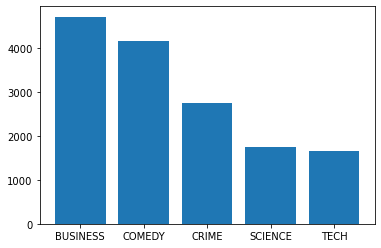

In [6]:
import matplotlib.pyplot as plt
nb_ex=pd.DataFrame(train['category'].value_counts()).reset_index()


print(nb_ex)

plt.bar(nb_ex['index'],nb_ex['category'])
plt.show()

       category                                           headline  count
0      BUSINESS  [mastercard, want, pay, stuff, selfi, compani,...     17
1      BUSINESS  [father, day, gift, daughter, make, connect, d...     17
2        COMEDY                                       [hasti, pud]      2
3      BUSINESS  [musk, miss, piec, tesla, insid, share, insigh...     28
4        COMEDY  [argu, femal, cast, trump, ghostbust, parodi, ...      8
...         ...                                                ...    ...
15014  BUSINESS  [remi, martin, 2, 500, euro, loui, xiii, cogna...     26
15015    COMEDY  [funniest, someecard, week, pictur, tax, day, ...     16
15016     CRIME  [mobster, whitey, bulger, say, life, wast, let...      9
15017      TECH  [watch, top, 9, youtub, video, week, look, see...     14
15018  BUSINESS  [warren, buffett, successor, four, potenti, ch...     21

[15019 rows x 3 columns]
   category      count
0  BUSINESS  18.930697
1    COMEDY  14.157338
2     CRIME  16.1

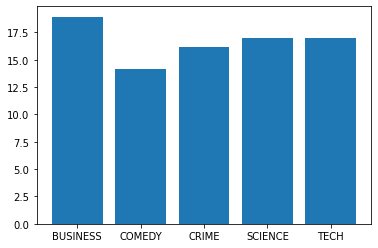

In [7]:
train_bis=train
train_bis['count']=count
print(train_bis)
cat_mean=train_bis.groupby('category')['count'].mean().reset_index()
print(cat_mean)
cat_mean=cat_mean.rename(columns={'count':'mean'})

plt.bar(cat_mean['category'],cat_mean['mean'])
plt.show()

In [8]:
#On calcule le nombre maximal et le nombre minimal de jetons par catégorie


mincat=train_bis.groupby('category')['count'].min().reset_index()
mincat=mincat.rename(columns={'count':'min'})

maxcat=train_bis.groupby('category')['count'].max().reset_index()
maxcat=maxcat.rename(columns={'count':'max'})

minmax=mincat
minmax['max']=maxcat['max']
print(minmax)


   category  min  max
0  BUSINESS    1   90
1    COMEDY    1   78
2     CRIME    1   75
3   SCIENCE    1   50
4      TECH    2   49


#### 1.3 Implémentez la fonction build_voc qui extrait votre vocabulaire de l’ensemble d’entrainement et crée une liste des jetons qui ont une fréquence d’occurrence de 5 au moins

In [9]:
      

def build_voc(documents):
    
    voc=dict()
    
    for i in range(len(documents)):
        for j in documents[i]:
            if j in voc.keys():
                voc[j]=voc[j]+1
            else :
                voc[j]=1
    
    voc_clean=dict()
    
    for v,f in voc.items():
        if f>=5:
            voc_clean[v]=f

        
            
        

    
    return voc_clean

In [10]:
vocabulary = build_voc(train["headline"])


#### 1.4 Vous devez créer une fonction get_top_vocab(vocab, n) qui retourne les n jetons les plus fréquents et les affiche

In [11]:


def get_top_vocab(vocab, n):
    
    sort=sorted((value,key) for (key,value) in vocab.items())

    top=[]

    for i in range(0,n):
        c=len(sort)-i-1
        top=top+[sort[c]]

    
    return top

#### 1.5 Affichez les 10 jetons les plus fréquents du vocabulaire de l’ensemble d’entraînement 

In [12]:
top10=get_top_vocab(vocabulary, 10)
print(top10)

[(1467, 'new'), (1343, 'year'), (1110, 'video'), (1101, 'trump'), (1025, 'one'), (1013, 'time'), (1006, 'say'), (1001, 'get'), (940, 'peopl'), (895, 'like')]


#### 1.6 Vous devez créer une fonction get_top_vocab_per_cls(dataset, n, cls) qui retourne les n jetonsles plus fréquents de la classe cls et les affiche

In [13]:

def get_top_vocab_per_cls(dataset, n, cls):

    data_cls=dataset[dataset['category']==cls].reset_index()
    head=data_cls['headline']
    
    voc_cls=dict()
    
    for i in range(len(head)):
        for j in head[i]:
            if j in voc_cls.keys():
                voc_cls[j]=voc_cls[j]+1
            else :
                voc_cls[j]=1
    
    sort=sorted((value,key) for (key,value) in voc_cls.items())

    top_cls=[]

    for i in range(0,n):
        c=len(sort)-i-1
        top_cls=top_cls+[sort[c]]
    
    
    return top_cls

#### 1.7 Affichez les 10 jetons les plus fréquents de la classe Business du vocabulaire de l'ensemble d'entraînement.

In [14]:
print(get_top_vocab_per_cls(train, 10, 'BUSINESS'))

[(705, 'busi'), (581, 'compani'), (493, 'new'), (448, 'year'), (423, 'time'), (412, 'work'), (407, 'make'), (375, 'peopl'), (373, 'job'), (363, 'one')]


# 2. Construction des sacs de mots

#### 2.1 Construisez la fonction tf_vectorizer qui retourne la matrice de termes d'occurences suivant la formule ci-dessous:


$$ \text{tf(t,d)} = \frac{f_{t,d}}{\sum_{t'\in d}f_{t',d}} $$ 

Où 

$$f_{t,d} = \text{la fréquence d'occurence de jeton t dans le document d} $$
$$\sum_{t'\in d}f_{t',d} = \text{le nombre total de jetons dans le document} $$

**Important**: Assurez-vous que les colonnes (représentant les jetons) sont dans le même ordre pour les 2 datasets (train, test). Par exemple: le jeton 'new' corresponderait à la colonne 101 pour les 2 matrices.

Créez ensuite, les matrices de termes d'occurence pour l'ensemble de train et test

In [15]:


def tf_vectorizer(documents, vocabulary):
    """
    Fonction qui transforme une liste de documents en matrice de termes d'occurence.
    
    :param documents: la liste de  documents a transformer
    :param vocabulary: la liste de jetons à considérer (ignorer les jetons pas dans cette liste)
    
    :return: la matrice tf des documents passés en paramètres
    """ 
    tf_matrix = np.zeros((len(documents), len(vocabulary)))
    
    list_of_tokens = list(vocabulary.keys()) 
    
    for d in range(len(documents)):
        for j in documents[d]:
            if j in vocabulary.keys():
                t=list_of_tokens.index(j)
                tf_matrix[d][t]+=1

                
        tot_d=len(documents[d])
        tf_matrix[d][:]=tf_matrix[d][:]/tot_d


            
    return tf_matrix

# Utiliser votre fonction sur l'ensemble train et test
tf_train=tf_vectorizer(train['headline'], vocabulary)
tf_test=tf_vectorizer(test['headline'], vocabulary)

print(tf_vectorizer(train['headline'], vocabulary))
print(tf_vectorizer(test['headline'], vocabulary))



[[0.05882353 0.05882353 0.05882353 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#### 2.1 Complétez la fonction tf_id_vectorizer qui retourne le sac de mot TF_IDF d'une liste de documents suivant la formule ci-dessous:


$$ \text{tf_idf}(t,d) = \text{tf(f,d)} * \text{idf(t,d)}$$ 


Où

$$ \text{idf}(t,d) = \log{\frac{N}{|\{d\in D : t \in d\}| + 1}} $$

$$ |\{d\in D : t \in d\}| = \text{le nombre de documents contenant le terme t} $$

$$ N = \text{le nombre total de document} $$

**Important**: Les valeurs idf sont calculés seulement sur l'ensemble d'entrainement, vous pouvez faire ce calcul à l'extérieur de la fonction pour simplifier la tâche

In [26]:
#Calcul de la matrice idf
idf_matrix = np.zeros((len(train['headline']), len(vocabulary)))
N=len(train['headline'])
list_of_tokens = list(vocabulary.keys())
list_nb_doc=[]
 
for voc in vocabulary.keys():
    nb_doc=0
    t=list_of_tokens.index(voc)
    for doc in train['headline']:
        if voc in doc :
            nb_doc+=1
    for d in range(len(train['headline'])):
        idf_matrix[d][t]=np.log(N/(nb_doc+1))




# Vous pouvez calculer les valeurs idf à l'extérieur de la fonction à des fins d'optimisation si vous le désirez

def tf_idf_vectorizer(documents, vocabulary,idf_matrix):
    tf_idf_matrix = np.zeros((len(documents), len(vocabulary)))
    tf_matrix=tf_vectorizer(documents, vocabulary)
    
    for t in range(len(vocabulary)):
        for d in range(len(documents)):
            tf_idf_matrix[d][t]=tf_matrix[d][t]*idf_matrix[d][t]
        


    return tf_idf_matrix

# TODO
# Utiliser votre fonction sur l'ensemble train et test
tf_idf_train=tf_idf_vectorizer(train['headline'], vocabulary,idf_matrix)
tf_idf_test=tf_idf_vectorizer(test['headline'], vocabulary,idf_matrix)

matricevect_train=tf_idf_vectorizer(train['headline'], vocabulary,idf_matrix)
matrice_vect_test=tf_idf_vectorizer(test['headline'], vocabulary,idf_matrix)


print(tf_idf_vectorizer(train['headline'], vocabulary,idf_matrix))
print(tf_idf_vectorizer(test['headline'], vocabulary,idf_matrix))

[[0.19529188 0.24331955 0.35827711 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


[array([0.19529188, 0.24331955, 0.35827711, ..., 0.        , 0.        ,
       0.        ]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.        , 0.19697297, 0.        , ..., 0.        , 0.        ,
       0.        ]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 

# 3. Classification automatique (avec SKlearn)


#### 3.1 Pour les 2 sacs de mots en 2), Entrainez un modèle Bayésien Naïf à l'aide de MultinomialNB et faites vos prédictions pour l'ensemble de test. 

Utilisez les paramètres par défaut du modèle.

Affichez les métriques suivantes: precision, recall et f1 score pour chaque classe avec une précision de 4 décimales. Vous pouvez utiliser la méthode classification_report de sklearn. 

In [17]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB


In [18]:
#Modèle de sacs de mots avec TF
tfx_train= tf_train
tfx_test=tf_test
tfy_train = train['category']
clftf = MultinomialNB()
clftf.fit(tfx_train, tfy_train)

tfy_pred=clftf.predict(tfx_test)
tfy_true=test['category']

print(classification_report(tfy_true, tfy_pred,digits=4))


              precision    recall  f1-score   support

    BUSINESS     0.4936    0.9732    0.6550      1232
      COMEDY     0.7842    0.7772    0.7807      1010
       CRIME     0.9844    0.4817    0.6469       656
     SCIENCE     1.0000    0.0069    0.0138       432
        TECH     0.0000    0.0000    0.0000       425

    accuracy                         0.6133      3755
   macro avg     0.6525    0.4478    0.4193      3755
weighted avg     0.6599    0.6133    0.5395      3755



In [19]:
#Modèle de sacs de mots TF_IDF
tfidf_x_train= tf_idf_train
tfidf_x_test=tf_idf_test
tfidf_y_train = train['category']
tfidf_clf = MultinomialNB()
tfidf_clf.fit(tfidf_x_train, tfidf_y_train)

tfidf_y_pred=tfidf_clf.predict(tfidf_x_test)
tfidf_y_true=test['category']


print(classification_report(tfidf_y_true, tfidf_y_pred,digits=4))

              precision    recall  f1-score   support

    BUSINESS     0.7515    0.8912    0.8154      1232
      COMEDY     0.8312    0.8535    0.8422      1010
       CRIME     0.8759    0.8933    0.8845       656
     SCIENCE     0.8818    0.7083    0.7856       432
        TECH     0.8008    0.4541    0.5796       425

    accuracy                         0.8109      3755
   macro avg     0.8283    0.7601    0.7815      3755
weighted avg     0.8153    0.8109    0.8046      3755



[[1199   30    3    0    0]
 [ 222  785    2    0    1]
 [ 300   40  316    0    0]
 [ 344   85    0    3    0]
 [ 364   61    0    0    0]]


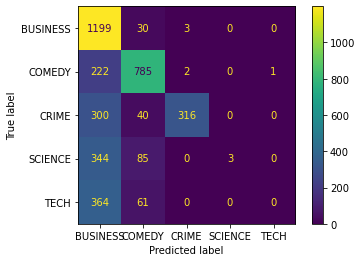

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print(matrix)
matrix=confusion_matrix(tfy_true, tfy_pred, labels=None, sample_weight=None, normalize=None)
disp=ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=train['category'].unique())
disp.plot()

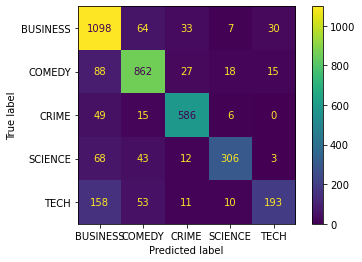

In [45]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(tfidf_y_true, tfidf_y_pred, labels=None, sample_weight=None, normalize=None)
disp=ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=train['category'].unique())
disp.plot()

#### 3.2 Discussion

**3.2.1** Quel modèle de sac de mots a la meilleure performance? Qu'est-ce qui explique cette différence?



Le modèle TF-IDF a une meilleure performance que le modèle TF. En effet ce modèle apporte plus d'informations que TF. Il combine TF qui nous donne l'information sur la fréquence d'apparition d'un terme dans le document considéré et IDF qui nous donne l'information de la rareté du terme dans le corpus et donc l'ensemble des documents.


**3.2.2** Pourquoi le classificateur a-t-il une moins bonne performance sur la classe TECH? Soyez précis et détaillez votre réponse. **Indice: Affichez et analysez les valeurs de la matrice de confusion.**


Nous remarquons que dans le modèle TF, les classes SCIENCE et TECH sont majoritairement prédictes dans la classe BUSINESS. Or la précision et le rappel valent :  
$$ \text{précision} = \frac{tp}{tp+fp} $$

$$ \text{rappel} = \frac{tp}{tp+fn} $$

Donc pour la classe SCIENCE, nous avons une précision excellente (1) (car tp = 3 et fp = 0) mais un rappel très proche de 0 (car fn = 429). Pour la classe TECH, un seul document a été prédit dans la classe TECH et correspond à une mauvaise classification car il appartient à la catégorie COMEDY, d'où une précision et un rappel nuls. 

Enfin pour le modèle TF-IDF, nous remarquons une difficulté à classer correctement les documents TECH en faveur de la classe BUSINESS. Cela peut s'expliquer par la distribution déséquilibrée des documents (1232 documents de la classe BUSINESS contre 371 de la classe TECH) ainsi qu'une potentielle similarité des thématiques.


# 4. Optimisation des modèles (Fine-Tuning)

#### 4.1 A l'aide de la classe GridSearchCV de sklearn, trouvez une configuration optimale pour le modèle MultinomialNB en vous basant sur la métrique F1. 

Utilisez la matrice tf-idf que vous avez contruite à la question 3. Affichez les paramètres finaux du classificateur ainsi que les métriques sur l'ensemble de test avec une précision de 4 décimales.

In [33]:
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

parameters = [{  
'alpha': [1, 0.1, 0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5] 
}]
f1_scorer = make_scorer(f1_score, average="weighted")

grid_search= GridSearchCV(MultinomialNB(), parameters,scoring=f1_scorer)
grid_search.fit(tfidf_x_train,tfidf_y_train)

print(grid_search.best_params_)

{'alpha': 0.35}


In [34]:
y_pred=grid_search.predict(tfidf_x_test)
print(classification_report(tfidf_y_true,y_pred,digits=4))

              precision    recall  f1-score   support

    BUSINESS     0.7760    0.8774    0.8236      1232
      COMEDY     0.8501    0.8366    0.8433      1010
       CRIME     0.8744    0.8918    0.8830       656
     SCIENCE     0.8464    0.7523    0.7966       432
        TECH     0.7429    0.5506    0.6324       425

    accuracy                         0.8176      3755
   macro avg     0.8180    0.7817    0.7958      3755
weighted avg     0.8175    0.8176    0.8145      3755



Matrice de confusion du modèle TF-IDF


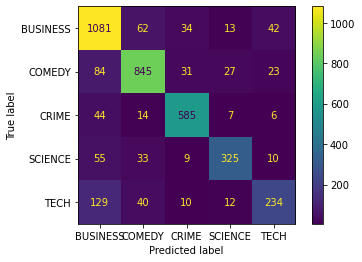

In [46]:
cm = confusion_matrix(test['category'], y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=train['category'].unique())
print("Matrice de confusion du modèle TF-IDF")
disp.plot()


#### 4.2 Utilisez maintenant la classe TfidfVectorizer de sklearn afin de trouver la configuration optimale du sac de mot. 

Utilisez encore GridSearchCV et combinez le modèle ainsi que le sac de mot dans une pipeline. Affichez les paramètres final du classificateur et du sac de mot, ainsi que les métriques sur l'ensemble de test avec une précision de 4 décimale.

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline



pipeline_count = Pipeline(
    [("vectorizer", TfidfVectorizer()),
     ("multinb", MultinomialNB())]
)

parameters = {
    "multinb__alpha": [0.1, 0.2, 0.25,0.3,0.35,0.4],
     "vectorizer__use_idf": [True,False],
     "vectorizer__smooth_idf":[True,False],
     'vectorizer__stop_words':[{'english'},None],
    "vectorizer__min_df" :[1,5],
    "vectorizer__lowercase":[True],
    "vectorizer__use_idf":[True],
    "vectorizer__smooth_idf":[True]
}

train_data=[" ".join(x) for x in train["headline"]]
test_data=[" ".join(x) for x in test["headline"]]



f1_scorer = make_scorer(f1_score, average="weighted")

grid_search= GridSearchCV(pipeline_count,param_grid= parameters,scoring=f1_scorer)
grid_search.fit(train_data,train['category'])
y_pred = grid_search.predict(test_data)

print(grid_search.best_params_)
print(classification_report(test['category'],y_pred,digits=4))

{'multinb__alpha': 0.2, 'vectorizer__lowercase': True, 'vectorizer__min_df': 5, 'vectorizer__smooth_idf': True, 'vectorizer__stop_words': {'english'}, 'vectorizer__use_idf': True}
              precision    recall  f1-score   support

    BUSINESS     0.7526    0.8912    0.8161      1232
      COMEDY     0.8322    0.8545    0.8432      1010
       CRIME     0.8913    0.8872    0.8892       656
     SCIENCE     0.8895    0.7269    0.8000       432
        TECH     0.8024    0.4776    0.5988       425

    accuracy                         0.8149      3755
   macro avg     0.8336    0.7675    0.7895      3755
weighted avg     0.8196    0.8149    0.8097      3755



#### 4.3 Discussion:

**4.3.1** Quels paramètres avez-vous inclus dans le GridSearch et comment affectent-t'ils le modèle? (Analysez chacun de vos paramètres)


Les paramètres inclus dans le GridSearch sont : 
- use_idf : permet d'indiquer que nous utilisons la matrice tfidf. Si sa valeur est False on utilise que la matrice tf.Ici, la meilleure solution est d'utiliser tfidf comme nous l'avons vu précédemment. 
-lowercase : converti tous les caractères en minuscules avant de tokéniser. La meilleure valeur est True. En effet, pour ce corpus, la différenciation ente lettres minuscules et majuscules n'est pas utile et n'améliore pas la différenciation entre classes ce qui pourrait être utile en analyse de sentiments par exemple. 
-min_df : ignore les termes ayant 


**4.3.2** Avez-vous obtenu un meilleur score en utilisant le sac de mot TF IDF provenant de sklearn? Pourquoi selon vous? 

**4.3.3** 
 Comment TF IDF est-il calculé par la librarie sklearn par rapport à la formule dans ce notebook? Pourquoi ce changement? **Indice: Regardez la documentation de [TfidfTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html)**
 

Pour le calcul du TF IDF un 1 est ajouté au numérateur. 